# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# columns for lat, lon, temp_max, humidity, clouds, wind speed, country, date

lat = []
lon = []
temperatures = []
wind_speed = []
clouds = []
humidity = []
country = []
date = []

cities_found = []

for city in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    # Get weather data
    
    
    try:
        print("Found city: " + city)
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temperatures.append(weather_json["main"]["temp"])
        wind_speed.append(weather_json["wind"]["speed"])
        clouds.append(weather_json["clouds"]["all"])
        humidity.append(weather_json["main"]["humidity"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
          
        # Do this at the end after appending the other lists           
        cities_found.append(city)

    except:
        
        print("Could not find: " + city)
    

Found city: victoria
Found city: bereda
Found city: brae
Found city: pundaguitan
Found city: grindavik
Found city: uige
Found city: baturaja
Found city: kamenskoye
Could not find: kamenskoye
Found city: high level
Found city: qaanaaq
Found city: srednekolymsk
Found city: punta arenas
Found city: hambantota
Found city: tuktoyaktuk
Found city: riverton
Found city: vaini
Found city: busselton
Found city: ushuaia
Found city: hermanus
Found city: tiksi
Found city: bani
Found city: medina del campo
Found city: saint-philippe
Found city: mataura
Found city: hobart
Found city: albany
Found city: rikitea
Found city: aqtobe
Found city: bredasdorp
Found city: lebu
Found city: port elizabeth
Found city: monroe
Found city: bluff
Found city: kapaa
Found city: praya
Found city: ocean city
Found city: saldanha
Found city: souillac
Found city: port alfred
Found city: atuona
Found city: warqla
Could not find: warqla
Found city: bom jesus
Found city: solnechnyy
Found city: belmonte
Found city: jamestown


Found city: la palma
Found city: sobolevo
Found city: nizhneyansk
Could not find: nizhneyansk
Found city: meyungs
Could not find: meyungs
Found city: gamboma
Found city: shimoda
Found city: jumla
Found city: otjiwarongo
Found city: alice springs
Found city: ahuimanu
Found city: prince rupert
Found city: oyama
Found city: guajara-mirim
Could not find: guajara-mirim
Found city: catamarca
Found city: sitka
Found city: leninskoye
Found city: alofi
Found city: port hawkesbury
Found city: pathein
Found city: hamilton
Found city: chapleau
Found city: jalu
Found city: beira
Found city: batagay-alyta
Found city: saint-augustin
Found city: ola
Found city: neryungri
Found city: okha
Found city: botou
Found city: mao
Found city: harbour breton
Found city: marsh harbour
Found city: kant
Found city: chicama
Found city: norsup
Found city: fuyang
Found city: tilichiki
Found city: paucartambo
Could not find: paucartambo
Found city: kavaratti
Found city: coos bay
Found city: honiara
Found city: bojnurd


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather = {
    "City": cities_found,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temperatures,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date 
}

city_data = pd.DataFrame(city_weather)
city_data

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,victoria,22.2855,114.1577,81.07,90,67,7.00,HK,1634144316
1,bereda,43.2686,-7.5406,65.88,72,1,4.63,ES,1634144452
2,brae,60.3964,-1.3530,53.51,85,100,23.26,GB,1634144452
3,pundaguitan,6.3711,126.1689,83.80,76,100,13.44,PH,1634144453
4,grindavik,63.8424,-22.4338,41.47,75,75,19.57,IS,1634144453
...,...,...,...,...,...,...,...,...,...
559,ancud,-41.8697,-73.8203,51.33,92,100,23.64,CL,1634144664
560,port blair,11.6667,92.7500,81.09,86,100,13.42,IN,1634144665
561,chato,-2.6378,31.7669,72.79,67,14,5.55,TZ,1634144665
562,birao,10.2849,22.7882,75.51,79,96,3.94,CF,1634144666


In [31]:
city_data.to_csv('city_weather_data.csv', encoding='utf-8')

In [6]:
city_data.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.725018,20.386591,63.487305,69.537234,61.257092,7.239699,1.634145e+09
std,32.444842,89.957994,20.397209,21.392476,37.590760,5.234094,8.767039e+01
min,-54.800000,-175.200000,-7.740000,7.000000,0.000000,0.000000,1.634144e+09
25%,-6.217850,-57.126850,46.960000,58.750000,24.000000,3.462500,1.634144e+09
50%,25.783350,25.770250,69.225000,75.000000,75.000000,5.990000,1.634145e+09
75%,47.979950,97.250000,78.735000,85.000000,98.000000,9.762500,1.634145e+09
max,78.218600,179.316700,103.690000,100.000000,100.000000,31.630000,1.634145e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

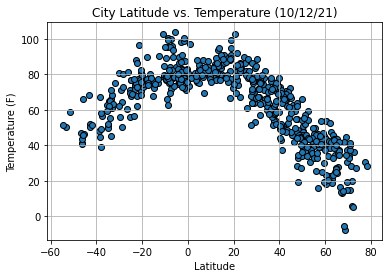

<Figure size 1080x1080 with 0 Axes>

In [19]:
x_values = city_data['Latitude']
y_values = city_data['Temperature']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Temperature (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

plt.savefig('lat_vs_temp.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# The code analyzes how hot or cold locations would be depending on their latitude coordinates.
# Based on the plot, coordinates between -20 to 20 have the highest temperatures as they are closest to the equator.
# Higher latitude coordinates point farther north up the globe, which is where the temperatures
# tend to be much colder, as proven by the gradual drop off once the latitude number exceeds past 20.

## Latitude vs. Humidity Plot

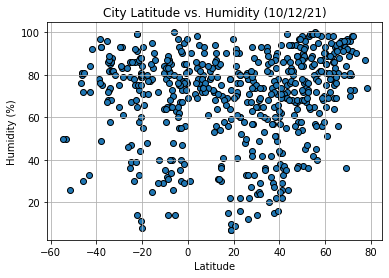

<Figure size 1080x1080 with 0 Axes>

In [20]:
x_values = city_data['Latitude']
y_values = city_data['Humidity']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Humidity (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig('lat_vs_humidity.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# The code analyzes how humid the locations are in accordance with their latitude.
# Based on the plot, there are many outliers, but the positive latitude coordinates have greater clusters than the negative ones.

## Latitude vs. Cloudiness Plot

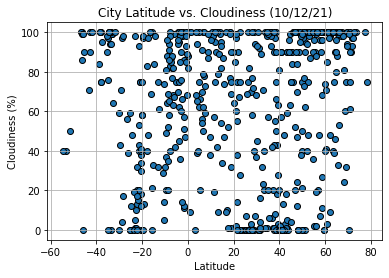

<Figure size 1080x1080 with 0 Axes>

In [21]:
x_values = city_data['Latitude']
y_values = city_data['Cloudiness']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Cloudiness (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig('lat_vs_cloudiness.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# In this plot, the code analyzes latitude coordinates with their levels of cloudiness.
# One clear observation shown in the data is that postiive latitude coordinates have 
# much more instances of maximum cloudiness than the negative ones.

## Latitude vs. Wind Speed Plot

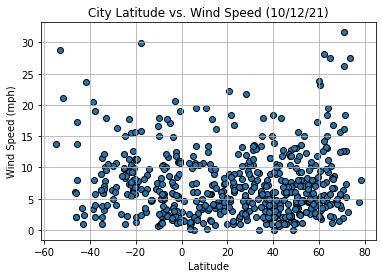

<Figure size 1080x1080 with 0 Axes>

In [22]:
x_values = city_data['Latitude']
y_values = city_data['Wind Speed']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Wind Speed (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig('lat_vs_wind.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# In this plot, the code looks to analyze if there's a relationship between latitude and wind speed.
# Based on the plots, wind speeds are the highest for coordinates with the lowest negatives and highest positives.
# The positive latitude coordinates, in particular ranging between 20 to 60,
# have a considerable cluster of similar wind speeds.

## Linear Regression

####  Northern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: -0.876505876121643


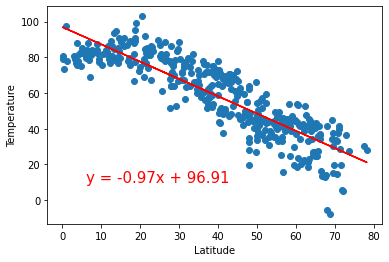

<Figure size 1080x1080 with 0 Axes>

In [23]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Latitude']
y_values = city_data_north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")

plt.savefig('north_temp_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between temperature and Northern Hemisphere latitude coordinates. 
# Clearly, their is a regression where the lower latitudes display higher temperatures, but the higher you go
# latitude numbers, the lower the temperature becomes.

####  Southern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: 0.762027936980694


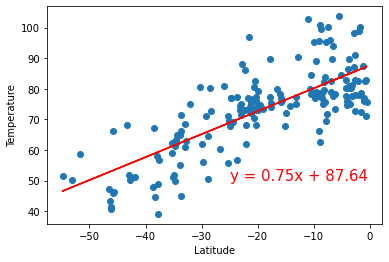

<Figure size 1080x1080 with 0 Axes>

In [24]:
city_data_south = city_data.loc[(city_data['Latitude']<=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")

plt.savefig('south_temp_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between temperature and Southern Hemisphere latitude coordinates. 
# This plot displays an inverse regression compared to the previous example with the North Hemisphere,
# where the higher the latitude coordinates, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.876505876121643


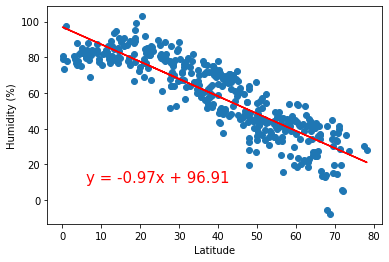

<Figure size 1080x1080 with 0 Axes>

In [25]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Latitude']
y_values = city_data_north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")

plt.savefig('north_humidity_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between humidity and Northern Hemisphere latitude coordinates. 
# This plot displays a clear regression where the increase in latitude leads to lower levels of humidity percentage.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.10217829513250994


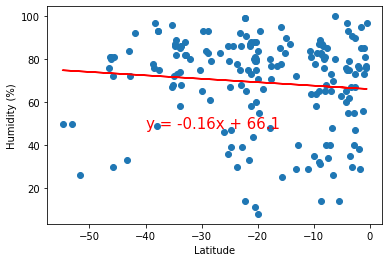

<Figure size 1080x1080 with 0 Axes>

In [26]:
city_data_south = city_data.loc[(city_data['Latitude']<=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,48),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")

plt.savefig('south_humidity_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between humidity and Southern Hemisphere latitude coordinates. 
# This plot is different in that it lacks a clear trend in the data because the regression path doesn't have a strong downwards lean.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1578193600466272


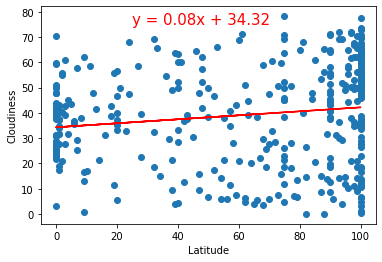

<Figure size 1080x1080 with 0 Axes>

In [27]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Cloudiness']
y_values = city_data_north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")

plt.savefig('north_cloudiness_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between cloudiness and Northern Hemisphere latitude coordinates. 
# This plot shows that the lowest coordinates are clustered in middle levels of cloudiness while the highest coordinates
# have a wide range in cloudiness from around 0 to nearly 80. Due to these observations, there's a lack of a strong
# regression in the data due to unstable levels of cloudiness from the location coordinates.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.006782682320372914


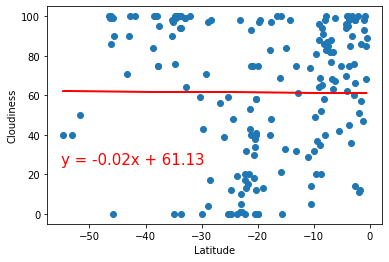

<Figure size 1080x1080 with 0 Axes>

In [28]:
city_data_south = city_data.loc[(city_data['Latitude']<=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")

plt.savefig('south_cloudiness_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between cloudiness and Southern Hemisphere latitude coordinates. 
# This plot shows that despite a negative r-value, there isn't a strong correlation in drop off of the data. There's a greater
# likelihood of higher cloudiness as the latitude gets closer to 0, but with the minimum latitude having a cloudiness of 40
# to begin the dataset, it doesn't upon up a strong line of overall comparison for the start and end of the y points.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17079008352300687


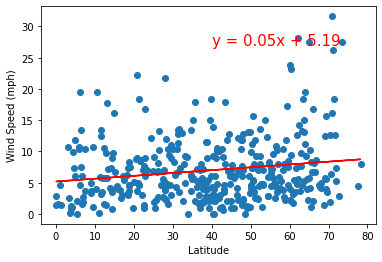

<Figure size 1080x1080 with 0 Axes>

In [29]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Latitude']
y_values = city_data_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")

plt.savefig('north_wind_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# This regression plot attempts to address a relationship between windiness and Northern Hemisphere latitude coordinates. 
# This plot shows that there is a positive increase in wind speed from the beginning of y points to the end near that
# at the 80 degree latitude x-point. In addition, the greatest outliers exist between the 60 to 75 degree latitude range.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17079008352300687


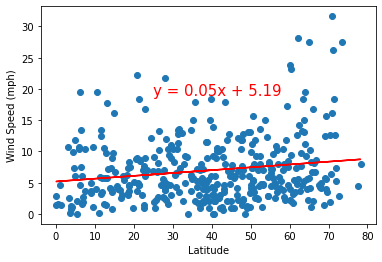

<Figure size 1080x1080 with 0 Axes>

In [30]:
city_data_south = city_data.loc[(city_data['Latitude']>=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,19),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")

plt.savefig('south_wind_lat_linregress.png')
plt.figure(figsize=(15,15))

plt.show()

In [ ]:
# DATA OBSERVATIONS

# 1. The highest temperatures in the data came from latitude coordinates closest to 0 degrees.

# 2. Northern Hemisphere latitude locations have a lot more locations with maximum cloudiness.

# 3. The outliers for the lowest levels of humidity are located on both the -20 and 20 degree latitude coordinates.